In [4]:
import os
import os
import pandas as pd
import fnmatch

We want to produce a new dataframe with one row that summarizes each summary bill file.
- text
- text_length
- party
- status
- full_encoding_length

In [76]:
parent_path = os.path.dirname(os.getcwd())
token_path = os.path.join(parent_path, "data", "tokenized")
data_explore_file = "data_explore.df"
data_explore_df = None

In [79]:
if not os.path.exists(data_explore_file):
    for root, dirs, files in os.walk(token_path):
        for f in files:
            if not fnmatch.fnmatch(f, "*shrunk*"):
                print(f)
                df = pd.read_pickle(os.path.join(root, f), compression="gzip")
                text = df["text"][0]
                text_length = len(text)
                party = df["party"][0]
                status = df["status"][0]
                encoding_length = df.shape[0]
                file_df = pd.DataFrame({"file_name": [f],
                                        "text": [text],
                                        "text_length": [text_length],
                                        "party": [party],
                                        "status": [status],
                                         "encoding_length": [encoding_length]})
                if data_explore_df is None:
                    print("initializing")
                    data_explore_df = file_df
                else:
                    print("appending")
                    data_explore_df = pd.concat([data_explore_df, file_df], ignore_index=True)
    data_explore_df.to_pickle(data_explore_file,compression="gzip")
else:
    print("loading existing file")
    data_explore_df = pd.read_pickle(data_explore_file, compression="gzip")

loading existing file


In [80]:
data_explore_df.head(5)

,file_name,text,text_length,party,status,encoding_length
0,summary_bill_1811_1392983.pkl,Establishing procedures for municipal host cus...,84,1,2,13056
1,summary_bill_1811_1392984.pkl,Relative to the referral of debts for collection.,49,1,2,9984
2,summary_bill_1811_1392985.pkl,Relative to termination of tenancy at the expi...,82,1,3,16128
3,summary_bill_1811_1392986.pkl,Relative to the justified use of deadly force ...,66,1,2,11520
4,summary_bill_1811_1392988.pkl,Relative to ratification of amendments to the ...,86,3,3,14592


In [21]:
from matplotlib import pyplot as plt

Let's look at the text lengths

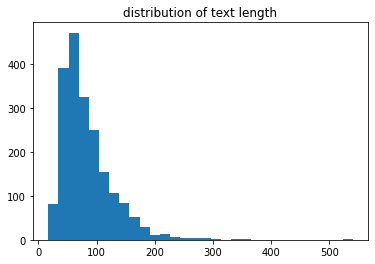

In [81]:
plt.hist(data_explore_df["text_length"], bins=30)
plt.title("distribution of text length")
plt.show()

Let's look at the distribution of party affiliation

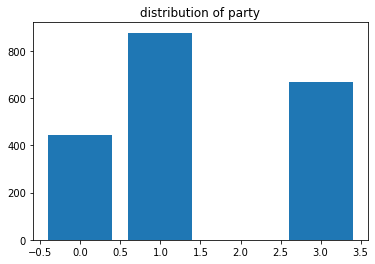

In [82]:
party_count = data_explore_df.groupby(["party"]).count()
party_count["names"] = ["Dem","Rep","Ind"]
ax = plt.subplot()
ax.bar(party_count.index, party_count["text"])
plt.title("distribution of party")
plt.show()

Look at the distribution of status values

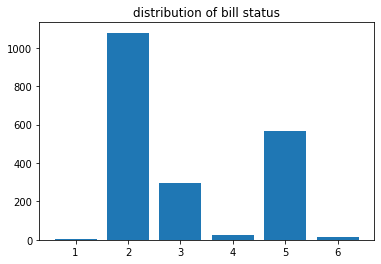

In [83]:
status_count = data_explore_df.groupby(["status"]).count()
ax_s = plt.subplot()
ax_s.bar(status_count.index, status_count["text"])
plt.title("distribution of bill status")
plt.show()

Distribution of encoding lengths

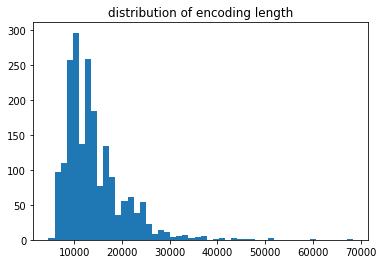

In [84]:
plt.hist(data_explore_df["encoding_length"], bins=50)
plt.title("distribution of encoding length")
plt.show()

Text length vs Encoding Length

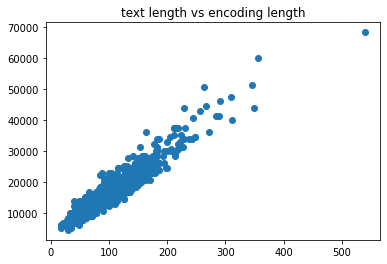

In [85]:
plt.scatter(data_explore_df["text_length"], data_explore_df["encoding_length"])
plt.title("text length vs encoding length")
plt.show()

Which file has the max text length and lets read it in

In [86]:
file_name = data_explore_df["file_name"][data_explore_df["text_length"].idxmax()]

In [87]:
max_length_file = pd.read_pickle(os.path.join(token_path, file_name), compression="gzip")

In [89]:
max_length_file["text"][0]

'Requiring certain licensing and reporting functions be conducted through the Nationwide Multistate Licensing System and Registry, relative to background investigations of trust officers, to certain filing fees, assessments, and interest rates, and to the transmission of consumer complaints by the banking department, requiring employers to provide certain workplace accommodations for employees, establishing the New Hampshire housing and conservation planning program, and relative to the collaborative care model service delivery method.'

party vs status

In [91]:
data_explore_df.groupby(["party","status"]).size()

party  status
0      2         334
       3          30
       5          80
       6           1
1      1           1
       2         480
       3         137
       4           9
       5         239
       6          10
3      1           1
       2         265
       3         129
       4          18
       5         249
       6           4
dtype: int64